**(1) Data Description:**

The data used for this project was collected by a UBC Computer Science research group. They created a MineCraft server and recorder players' actions.

**A. players.csv: information about the unique players**

- Number of observations: 196
- Number of variables: 7

|Column Heading | Type       | Description                              |
|---------------|------------|------------------------------------------|
|experience     |factor      |experience level                          |
|subscribe       |logical     |subscription to a game-related newsletter |
|hashedEmail    |character   |unique hashed identifier                  |
|played_hours   |double      |played hours                              |
|name           |character   |name                                      |
|gender         |factor      |gender                                    |
|Age            |integers    |age                                       |


Potential issues:
- 2 values missing from Age column. 

**B. sessions.csv: information on individual play sessions by each player**

- Number of observations: 1535
- Number of variables: 5

|Column Heading | Type       | Description                              |
|---------------|------------|------------------------------------------|
|hashedEmail    |character      |unique hashed identifier                          |
|start_time     |character     |session start time |
|end_time       |character   |session end time                  |
|original_start_time   |double      |session start time (Epoch)                              |
|original_end_time     |double   |session end time (Epoch)    |

Potential issues:
- 2 values missing from end_time column and 2 values missing from start_time column
- The time in the start_time and end_time column are stored as strings of characters that may be difficult to analyze

**(2) Questions:**

Broad question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Specific question: Can a players' age and hours of MineCraft played predict newsletter subscription status in the players.csv dataset? 

The data in the players.csv data set includes the necessary information.  


**(3) Exploratory Data Analysis and Visualization:**

In [13]:
library(tidyverse)

player_data <- read_csv("players.csv")
session_data <- read_csv("sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


The mean value for each quantitative variable in players.csv:

In [14]:
mean_data <- summarize(player_data, 
          played_hours_mean = mean(played_hours),
          age_mean = mean(Age, na.rm = TRUE))
mean_data

played_hours_mean,age_mean
<dbl>,<dbl>
5.845918,20.52062


Exploratory visualizations using the age, hours played, and subscription variables from the players.csv data have been created to gain a better understanding of the distribution of values and relationships between variables. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


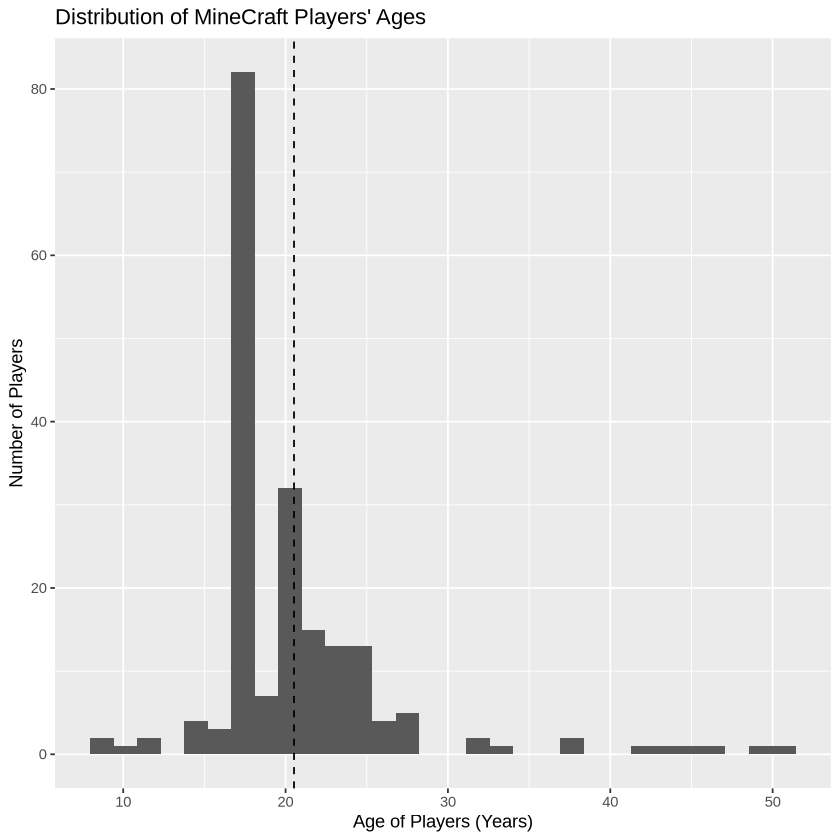

In [35]:
age_histogram <- player_data |> ggplot (aes(x = Age)) +
    geom_histogram() +
    xlab("Age of Players (Years)") +
    ylab("Number of Players") +
    ggtitle("Distribution of MineCraft Players' Ages") +
    geom_vline(xintercept = 20.52062, linetype = "dashed")
age_histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


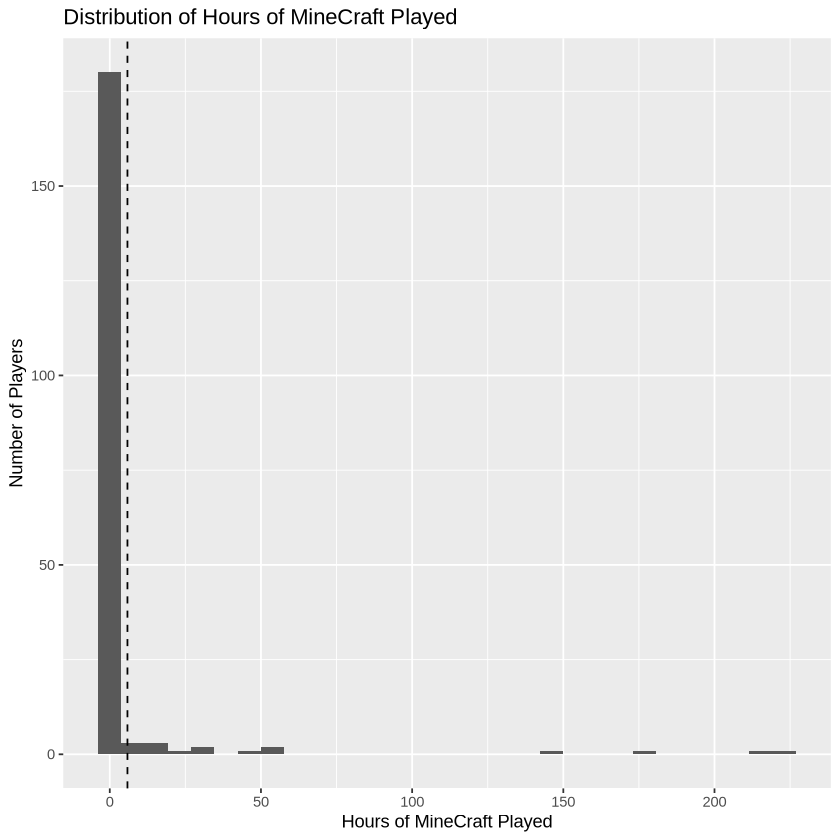

In [38]:
hours_histogram <- player_data |> ggplot (aes(x = played_hours)) +
    geom_histogram() +
    xlab("Hours of MineCraft Played") +
    ylab("Number of Players") +
    ggtitle("Distribution of Hours of MineCraft Played") +
    geom_vline(xintercept = 5.845918, linetype = "dashed")
hours_histogram

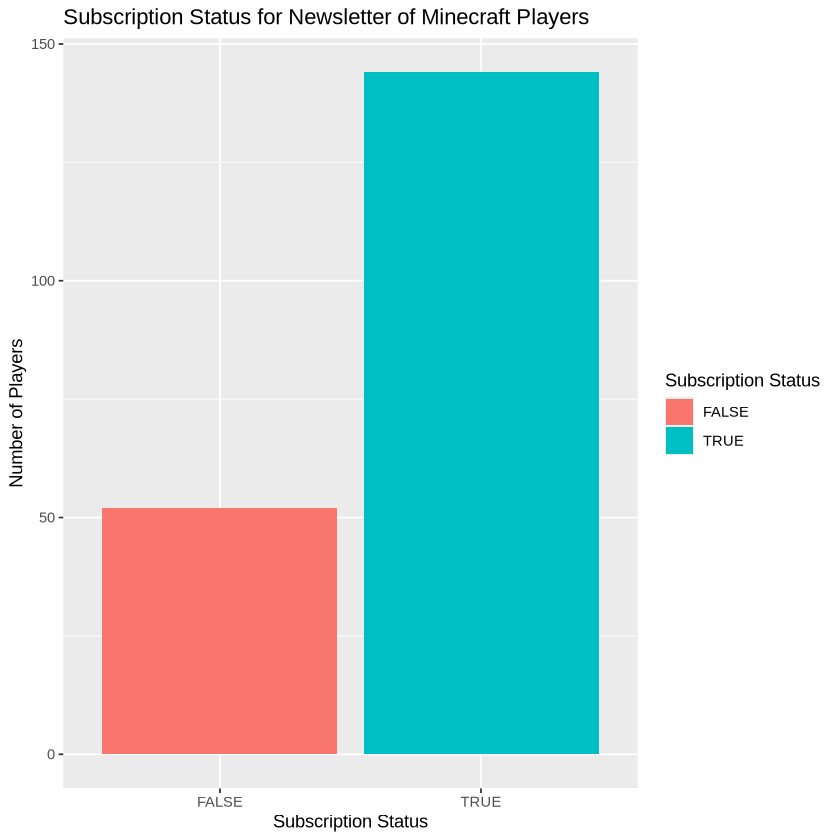

In [34]:
subscription_bar <- player_data |> ggplot(aes(x = subscribe, fill = subscribe)) +
    geom_bar() +
    xlab("Subscription Status") +
    ylab("Number of Players") + 
    labs(fill = "Subscription Status") +
    ggtitle("Subscription Status for Newsletter of Minecraft Players")
subscription_bar

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


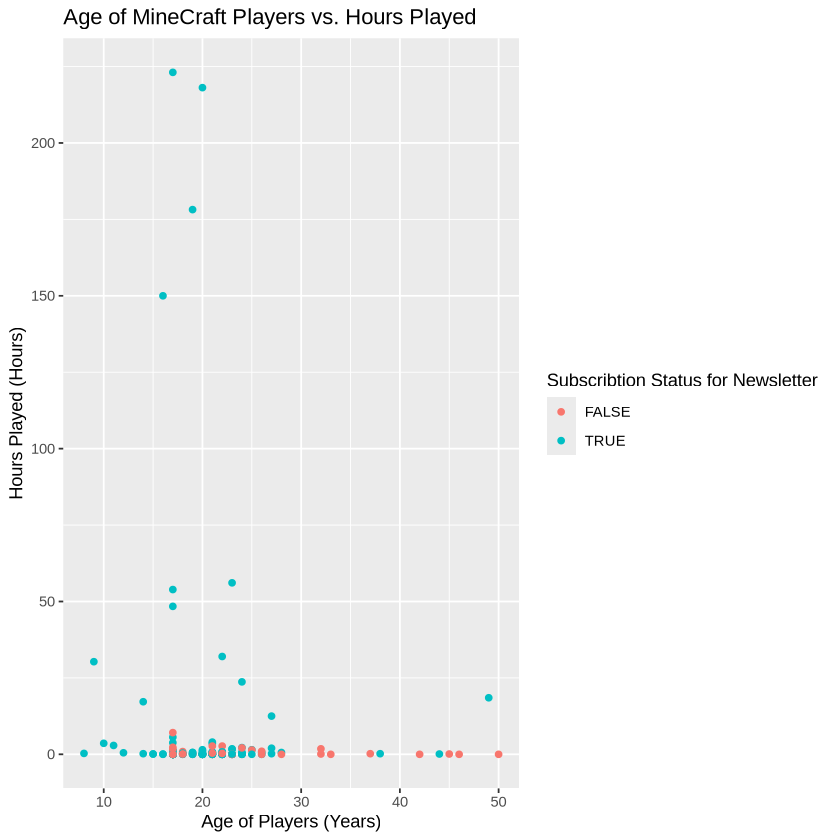

In [37]:
age_hours_plot <- player_data |> ggplot(aes(x = Age, y = played_hours, colour = as_factor(subscribe))) +
    geom_point() +
    xlab("Age of Players (Years)") +
    ylab("Hours Played (Hours)") +
    ggtitle("Age of MineCraft Players vs. Hours Played") +
    labs(colour = "Subscribtion Status for Newsletter")
age_hours_plot

**(4) Methods and Plan:**

The knn algorithm is a simple but effective method to predict a categorical class (subscription) for an observation given its other variables (age and the number of hours played). An advantage is that it does not make assumptions about the shape of the data, meaning it can make predictions for non-linear data which is important because there may not be a linear relationship. However, one limitation is that while the method may allow us to answer the specific question, it may not be able to fully investigate what player characteristics and behaviours are most predictive of subscription to the newsletter, as there are many factors that may have influence but are not included in analysis. 

Some assumptions must be made to apply knn classification. For example, we must assume that trends in subscription are based on player characteristics and actions in order for our model to effectively make a prediction. Additionally, the predictors should be standardized to be on a comparable scale for distance calculations.

The data will be split where 70% is used for training and 30% is used for testing, ensuring there is enough data to train the model while evaluating its classification of unseen data. k-fold cross-validation can be implemented on the training set to evaluate the model's performance. Different values of k can be tested, and the one that yields the best performance based on cross-validation results can be selected. We can then evaluate the performance of the model on the test set.